Final cost: 1.4752365982518167
Parameters (θ0, θ1): [4.01656348 4.06030611]


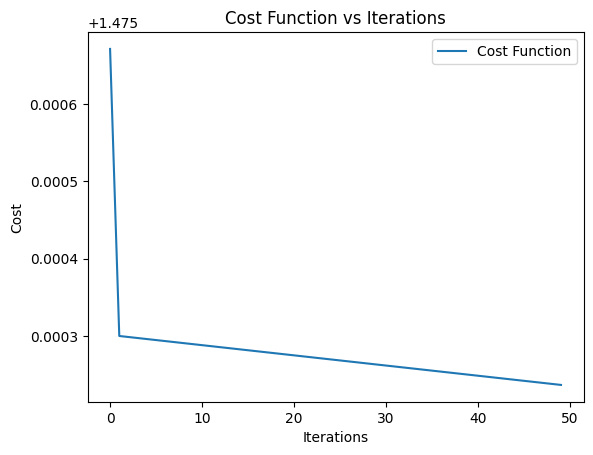

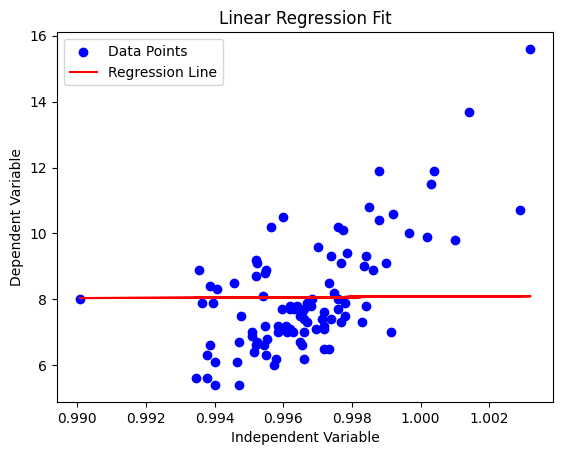

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    0.99523, 0.99007, 0.99769, 0.99386, 0.99508, 0.9963, 1.0032, 0.99768, 0.99584,
    0.99609, 0.99774, 1.0003, 0.99694, 0.99965, 0.99549, 0.99364, 0.99378, 0.99379,
    0.99524, 0.9988, 0.99733, 0.9966, 0.9955, 0.99471, 0.99354, 0.99786, 0.9965,
    0.9988, 0.9964, 0.99713, 0.9985, 0.99565, 0.99578, 0.9976, 1.0014, 0.99685,
    0.99648, 0.99472, 0.99914, 0.99408, 0.9974, 1.0002, 0.99402, 0.9966, 0.99402,
    1.0029, 0.99718, 0.9986, 0.9952, 0.9952, 0.9972, 0.9976, 0.9968, 0.9978,
    0.9951, 0.99629, 0.99656, 0.999, 0.99836, 0.99396, 0.99387, 1.0004, 0.9972,
    0.9972, 0.99546, 0.9978, 0.99596, 0.99572, 0.9992, 0.99544, 0.99747, 0.99668,
    0.9962, 0.99346, 0.99514, 0.99476, 1.001, 0.9961, 0.99598, 0.99608, 0.9966,
    0.99732, 0.9962, 0.99546, 0.99738, 0.99456, 0.9966, 0.99553, 0.9984, 0.9952,
    0.997, 0.99586, 0.9984, 0.99542, 0.99655, 0.9962, 0.9976, 0.99464, 0.9983,
    0.9967
])

y = np.array([
    9.1, 8, 9.1, 8.4, 6.9, 7.7, 15.6, 7.3, 7, 7.2, 10.1, 11.5, 7.1, 10, 8.9, 7.9,
    5.6, 6.3, 6.7, 10.4, 8.5, 7.4, 6.3, 5.4, 8.9, 9.4, 7.5, 11.9, 7.8, 7.4, 10.8,
    10.2, 6.2, 7.7, 13.7, 8, 6.7, 6.7, 7, 8.3, 7.4, 9.9, 6.1, 7, 5.4, 10.7, 7.6,
    8.9, 9.2, 6.6, 7.2, 8, 7.8, 7.9, 7, 7, 7.6, 9.1, 9, 7.9, 6.6, 11.9, 6.5, 7.1,
    8.8, 7.5, 7.7, 6, 10.6, 6.6, 8.2, 7.9, 7.1, 5.6, 6.4, 7.5, 9.8, 7, 10.5, 7.1,
    6.2, 6.5, 7.7, 7.2, 9.3, 8.5, 7.7, 6.8, 7.8, 8.7, 9.6, 7.2, 9.3, 8.1, 6.6, 7.8,
    10.2, 6.1, 7.3, 7.3
    ])

m = len(y)

X_b = np.c_[np.ones((m, 1)), X]

theta = np.zeros(2) 
alpha = 0.5 
num_iterations = 50 
convergence_threshold = 1e-6

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations, convergence_threshold):
    cost_history = []
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < convergence_threshold:
            break
    return theta, cost_history

theta, cost_history = gradient_descent(X_b, y, theta, alpha, num_iterations, convergence_threshold)

print("Final cost:", cost_history[-1])
print("Parameters (θ0, θ1):", theta)

plt.figure()
plt.plot(range(len(cost_history)), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs Iterations')
plt.legend()
plt.show()

plt.figure()
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_b.dot(theta), color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
